<a href="https://colab.research.google.com/github/SagarSudani/Pneumonia-Diagnosis-Using-Deep-Learning/blob/main/pneumonia_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download Dataset**

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "sagarsudani"
os.environ['KAGGLE_KEY']="1732f22aa502aec3f116d818235fed7c"

In [ ]:
!kaggle datasets download paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [01:32<00:00, 23.7MB/s]
100% 2.29G/2.29G [01:32<00:00, 26.6MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

**Implemantation of model**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ImageDataGenerator

In [ ]:
train_dir='/content/chest_xray/train'
test_dir='/content/chest_xray/test'
val_dir='/content/chest_xray/val'

In [ ]:
img_height = 128
img_width = 128
batch_size = 32

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


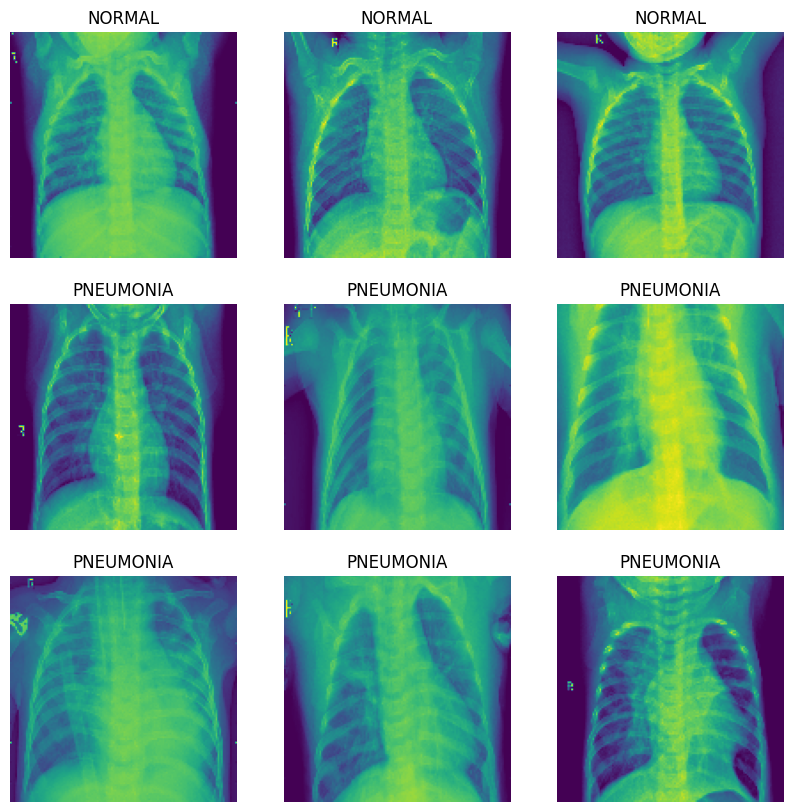

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [ ]:
resnet = ResNet50(input_shape=(img_height,img_width,3),weights='imagenet',include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
model = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu', input_shape=(img_height, img_width, 1)), # Specify input_shape with 1 channel
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 131s 780ms/step - accuracy: 0.8248 - loss: 0.3767 - val_accuracy: 0.9375 - val_loss: 0.2011
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 797ms/step - accuracy: 0.9429 - loss: 0.1435 - val_accuracy: 0.8125 - val_loss: 0.3690
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 130s 792ms/step - accuracy: 0.9661 - loss: 0.0808 - val_accuracy: 1.0000 - val_loss: 0.1505
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 127s 778ms/step - accuracy: 0.9722 - loss: 0.0719 - val_accuracy: 0.8125 - val_loss: 0.4606
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 128s 781ms/step - accuracy: 0.9785 - loss: 0.0591 - val_accuracy: 0.8125 - val_loss: 0.3827
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 787ms/step - accuracy: 0.9838 - loss: 0.0426 - val_accuracy: 0.8750 - val_loss: 0.1772
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 147s 818ms/step - accuracy: 0.9870 - loss: 0.0342 - val_accuracy: 1.0000 - val_loss: 0.0464
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 136s 784ms/step - accuracy: 0.9889 -

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,466,056 (9.41 MB)

 Trainable params: 822,018 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,644,038 (6.27 MB)

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 344ms/step - accuracy: 0.7856 - loss: 1.7206
Test Accuracy: 78.04%


In [ ]:
test_loss, test_acc = model.evaluate(train_ds)
print(f"precision score: {test_acc * 100:.2f}%")

163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 380ms/step - accuracy: 0.9940 - loss: 0.0144
precision score: 99.50%


In [ ]:
test_loss, test_acc = model.evaluate(val_ds)
print(f"recall score: {test_acc * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.8125 - loss: 0.2779
recall score: 81.25%


In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"f1 score: {test_acc * 100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 253ms/step - accuracy: 0.7558 - loss: 2.0626
f1 score: 78.04%
